The data only contains page_views > 1
The data only has first 6 pages (max) for a user
Both clickers and non-clickers are sampled down 10:1 , which contains 7600 clicker and 262072 non-clickers

In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

data = pd.read_csv('Sophia_click_downsize.csv')

data.head()

,f_event_guid_userid,f_event_guid_sessionid,event_guid_timestamp,event_record_datetime,f_event_request_pagecategory,f_event_request_pagename,f_event_uservehicle,f_event_uservehicle_modelyear,avg_event_uservehicle_modelyear,f_event_uservehicle_usein,referral_type_sess,referral_type_userid,f_event_location_zipcode,f_browser,f_devicemodel,f_platformtype,sess_prev_dwell_time,ave_sess_dwell_time,is_click_page,click_page_guid,clicked_page_num,total_page_click,is_click_more,ad_type_userid,is_retn,is_conq,is_type,is_other
0,00005430-19fd-11e5-a5b1-06d6afe191cd,133568281075367872,1435101009535,2015-06-23 16:10:13 UTC,used_model_mydp,used_model_mydp_pricing_estimate,minicooper,2013,2013.000000,used,google,google,85201,Chrome,Windows PC,Computer,NaN,NaN,0,0,0,0,0,NaN,0,0,0,0
1,00005430-19fd-11e5-a5b1-06d6afe191cd,133568281075367872,1435101020748,2015-06-23 16:10:24 UTC,used_model_mydp,used_model_mydp_pricing_estimate,minicooper,2013,2013.000000,used,google,google,85201,Chrome,Windows PC,Computer,11,11.000000,0,0,0,0,0,NaN,0,0,0,0
2,00005430-19fd-11e5-a5b1-06d6afe191cd,133568281075367872,1435101076789,2015-06-23 16:11:20 UTC,used_model_mydp,used_model_mydp_pricing_estimate,minicooper,2012,2012.666667,used,google,google,85201,Chrome,Windows PC,Computer,56,33.500000,0,0,0,0,0,NaN,0,0,0,0
3,00005430-19fd-11e5-a5b1-06d6afe191cd,133568281075367872,1435101099131,2015-06-23 16:11:42 UTC,used_model_car_inventory,used_model_car_inventory_srp,NaN,0,2012.666667,NaN,google,google,85201,Chrome,Windows PC,Computer,22,29.666667,0,0,0,0,0,NaN,0,0,0,0
4,00005430-19fd-11e5-a5b1-06d6afe191cd,133568281075367872,1435101160292,2015-06-23 16:12:43 UTC,used_model_mydp,used_model_mydp_pricing_estimate,minicooper,2010,2012.000000,used,google,google,85201,Chrome,Windows PC,Computer,61,37.500000,0,0,0,0,0,NaN,0,0,0,0


In [2]:
from collections import defaultdict
import scipy.sparse as sps
import pandas as pd, os

def count_sort(xstring, top):
    new_string = xstring.fillna('missing')
    counts = defaultdict(int)
    for x in xstring:
        counts[x] += 1
    return sorted(counts.items(), reverse=True, key=lambda tup: tup[1])[:top]

In [3]:
from collections import defaultdict
import scipy.sparse as sps
import pandas as pd, os

def select_top_category(xstring, percent):
    
    '''Return top category that account for 95% of the number
    INPUT: dataframe['colum'].dropna(), percent 95
    OUTPUT: list of strings
    
    Note: no other category, use together with .dropna() to avoid nan
    '''
    
    new_string = xstring.fillna('missing')
    counts = defaultdict(int)
    for x in xstring:
        counts[x] += 1
    name_count = sorted(counts.items(), reverse=True, key=lambda tup: tup[1])
    
    total_num = sum(map(lambda (x,y): y, name_count))
    accum = 0.0
    name_percent = defaultdict(int)
    for name, count in name_count:
        accum = accum + count
        accum_percent = accum/total_num
        name_percent[name] = accum_percent
    
    name_percent_out = sorted(filter(lambda (x,y): y < percent/100.0,name_percent.items()),key = lambda tup: tup[1])
    name_list = map(lambda(x,y): x,name_percent_out)  
    #name_list_dropother = name_list[name_list != 'other']
    if 'other' in name_list:
        name_list.remove('other')
    return name_list

In [122]:
print select_top_category(data['f_event_request_pagecategory'],95)
print len(select_top_category(data['f_event_uservehicle'].dropna(),90))
print select_top_category(data['referral_type_userid'].dropna(),100)

['used_model_mydp', 'new_model_mydp', 'mobile_used_model_mydp', 'mobile_new_model_mydp', 'home_page', 'model_review', 'mobile_used_model_car_inventory', 'used_model_car_inventory', 'model_photoflipper', 'mobile_new_model_car_inventory', 'used_cars_index', 'car_reviews', 'mobile_model_review', 'advice', 'new_type_index', nan, 'new_model_car_inventory', 'mobile_home_page', 'mobile_advice', 'new_finder', 'mobile_car_reviews', 'comparator', 'car_incentives', 'mobile_photogallery', 'mobile_used_cars_index', 'make_index', 'calculators', 'new_make_index', 'used_cars_tmv_appraiser', 'preprod_model_mydp', 'new_cars_index', 'car_inventory', 'used_car_inventory', 'car_news', 'localdealers', 'mobile_car_incentives', 'search', 'whats_hot', 'mobile_car_inventory', 'maintenance']
370
['google', 'edmunds', 'bing', 'yahoo']


In [5]:
#print len(select_top_category(data['f_event_location_zipcode'].dropna(),50))
print select_top_category(data['f_browser'].dropna(),97)
print select_top_category(data['f_devicemodel'].dropna(),97)
print select_top_category(data['f_platformtype'].dropna(),98)

['Chrome', 'Safari', 'Internet Explorer']
['Windows PC', 'Android', 'iPhone', 'Mac']
['Computer', 'Mobile']


In [123]:
cutoff = 2
data_pages = data.groupby('f_event_guid_userid').filter(lambda x: len(x) > cutoff)
data_analyze = data_pages.groupby('f_event_guid_userid').head(3)

In [125]:
data_analyze.describe()[['ave_sess_dwell_time','total_page_click','is_click_more']]

,ave_sess_dwell_time,total_page_click,is_click_more
count,365340.000000,590061.000000,590061.000000
mean,96.690737,0.040318,0.027246
std,808.921303,0.235024,0.162801
min,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000
50%,35.500000,0.000000,0.000000
75%,77.000000,0.000000,0.000000
max,264544.000000,27.000000,1.000000


In [188]:
data_analyze_copy = data_analyze.copy()
#### inlcude nan in the transformed data 
pagecategory = select_top_category(data_analyze_copy['f_event_request_pagecategory'],90)
#pagecategory = select_top_category(data_analyze_copy['f_event_request_pagecategory'].dropna(),90)
uservehicle = select_top_category(data_analyze_copy['f_event_uservehicle'],90)
referral_type = select_top_category(data_analyze_copy['referral_type_userid'],100)

browser = select_top_category(data_analyze_copy['f_browser'],97)
devicemodel = select_top_category(data_analyze_copy['f_devicemodel'],97)
platformtype = select_top_category(data_analyze_copy['f_platformtype'],98)

data_analyze_copy[~data_analyze_copy['f_event_request_pagecategory'].isin(pagecategory)].ix[:,'f_event_request_pagecategory'] = 'other'
data_analyze_copy[~data_analyze_copy['f_event_uservehicle'].isin(uservehicle)].ix[:,'f_event_uservehicle'] = 'other'
data_analyze_copy[~data_analyze_copy['referral_type_userid'].isin(referral_type)].ix[:,'referral_type_userid'] = 'other'

data_analyze_copy[~data_analyze_copy['f_browser'].isin(browser)].ix[:,'f_browser'] = 'other'
data_analyze_copy[~data_analyze_copy['f_devicemodel'].isin(devicemodel)].ix[:,'f_devicemodel'] = 'other'
data_analyze_copy[~data_analyze_copy['f_platformtype'].isin(devicemodel)].ix[:,'f_platformtype'] = 'other'
#print len(pagecategory)
#print uservehicle
##print len(set(data_analyze['f_event_request_pagecategory']))

In [190]:
data_analyze_copy.head()

,f_event_guid_userid,f_event_guid_sessionid,event_guid_timestamp,event_record_datetime,f_event_request_pagecategory,f_event_request_pagename,f_event_uservehicle,f_event_uservehicle_modelyear,avg_event_uservehicle_modelyear,f_event_uservehicle_usein,referral_type_sess,referral_type_userid,f_event_location_zipcode,f_browser,f_devicemodel,f_platformtype,sess_prev_dwell_time,ave_sess_dwell_time,is_click_page,click_page_guid,clicked_page_num,total_page_click,is_click_more,ad_type_userid,is_retn,is_conq,is_type,is_other
0,00005430-19fd-11e5-a5b1-06d6afe191cd,133568281075367872,1435101009535,2015-06-23 16:10:13 UTC,used_model_mydp,used_model_mydp_pricing_estimate,minicooper,2013,2013.000000,used,google,google,85201,Chrome,Windows PC,Computer,NaN,NaN,0,0,0,0,0,NaN,0,0,0,0
1,00005430-19fd-11e5-a5b1-06d6afe191cd,133568281075367872,1435101020748,2015-06-23 16:10:24 UTC,used_model_mydp,used_model_mydp_pricing_estimate,minicooper,2013,2013.000000,used,google,google,85201,Chrome,Windows PC,Computer,11,11.0,0,0,0,0,0,NaN,0,0,0,0
2,00005430-19fd-11e5-a5b1-06d6afe191cd,133568281075367872,1435101076789,2015-06-23 16:11:20 UTC,used_model_mydp,used_model_mydp_pricing_estimate,minicooper,2012,2012.666667,used,google,google,85201,Chrome,Windows PC,Computer,56,33.5,0,0,0,0,0,NaN,0,0,0,0
5,00005660-1c7d-11e5-9bcb-0ef7f507dee6,34541317181466188,1435375890767,2015-06-26 20:31:30 UTC,advice,advice_selling_article,NaN,0,NaN,NaN,google,google,02184,Safari,Mac,Computer,NaN,NaN,0,0,0,0,0,NaN,0,0,0,0
6,00005660-1c7d-11e5-9bcb-0ef7f507dee6,34541317181466188,1435376004934,2015-06-26 20:33:26 UTC,used_model_mydp,used_model_mydp_pricing_estimate,toyotacamry,2013,2013.000000,used,google,google,02184,Safari,Mac,Computer,116,116.0,0,0,0,0,0,NaN,0,0,0,0


In [173]:
from sklearn.feature_extraction import DictVectorizer

def one_hot_dataframe(data, cols, replace=False):
    """ Takes a dataframe and a list of columns that need to be encoded.
        Returns a 3-tuple comprising the data, the vectorized data,
        and the fitted vectorizor.
    """
    vec = DictVectorizer()
    #mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].to_dict(orient ='records')).toarray())
    vecData.columns = vec.get_feature_names()
    vecData.index = data.index
    vecData_join = data[['f_event_guid_userid']].join(vecData)
    if replace is True:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData_join)

In [191]:
col_transform = ['f_event_request_pagecategory','f_event_uservehicle','referral_type_userid',\
                'f_browser','f_devicemodel','f_platformtype']
data_original, data_transformed = one_hot_dataframe(data_analyze_copy, col_transform)
print data_transformed.shape

#data_analyze_copy['f_event_guid_userid', ]

(590061, 1190)


In [183]:
data_transformed_sum = data_transformed.groupby('f_event_guid_userid').cumsum()  ## cautious took a while
data_transformed_ave = data_transformed_sum.apply(lambda x: x/3.0)
print data_transformed_sum.head()

,f_browser=Apple WebKit,f_browser=Chrome,f_browser=Firefox,f_browser=Internet Explorer,f_browser=Mozilla,f_browser=Opera,f_browser=Safari,f_browser=SeaMonkey,f_browser=Thunderbird,f_browser=Unknown,f_devicemodel=Android,f_devicemodel=Blackberry,f_devicemodel=Kindle Fire,f_devicemodel=Mac,f_devicemodel=Windows PC,f_devicemodel=Windows Phone,f_devicemodel=Windows Tablet,f_devicemodel=iPad,f_devicemodel=iPhone,f_devicemodel=other,f_event_request_pagecategory,f_event_request_pagecategory=New_Car_Inventory,f_event_request_pagecategory=_model_mydp,f_event_request_pagecategory=advice,f_event_request_pagecategory=answers,f_event_request_pagecategory=autoshow,f_event_request_pagecategory=calculators,f_event_request_pagecategory=calculators_spmodal,f_event_request_pagecategory=car_incentives,f_event_request_pagecategory=car_inventory,...,f_event_uservehicle=volvo960,f_event_uservehicle=volvoc30,f_event_uservehicle=volvoc70,f_event_uservehicle=volvos40,f_event_uservehicle=volvos60,f_event_uservehicle=volvos70,f_event_uservehicle=volvos80,f_event_uservehicle=volvos90,f_event_uservehicle=volvov40,f_event_uservehicle=volvov50,f_event_uservehicle=volvov60,f_event_uservehicle=volvov60crosscountry,f_event_uservehicle=volvov70,f_event_uservehicle=volvov90,f_event_uservehicle=volvoxc,f_event_uservehicle=volvoxc60,f_event_uservehicle=volvoxc70,f_event_uservehicle=volvoxc90,f_platformtype=Computer,f_platformtype=Digital media receiver,f_platformtype=Game console,f_platformtype=Mobile,f_platformtype=Tablet,f_platformtype=Unknown,referral_type_userid=bing,referral_type_userid=carspecatalog,referral_type_userid=edmunds,referral_type_userid=google,referral_type_userid=other,referral_type_userid=yahoo
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0
2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0


In [185]:
data_original_slice = data_original[['f_event_guid_userid','avg_event_uservehicle_modelyear','f_event_uservehicle_usein',\
                                    'ave_sess_dwell_time','clicked_page_num','total_page_click',\
                                    'is_click_more', 'ad_type_userid','is_retn', 'is_conq','is_type','is_other']]
data_join = data_original_slice.join(data_transformed_sum)

TypeError: 'numpy.int64' object is not callable

In [206]:
print data_join.shape

data_join['cumcount'] = data_join.groupby('f_event_guid_userid').cumcount()
data_join_sub = data_join[data_join['cumcount'] == 2]
data_join_sub.head()

(590061, 1201)


,f_event_guid_userid,avg_event_uservehicle_modelyear,f_event_uservehicle_usein,ave_sess_dwell_time,clicked_page_num,total_page_click,is_click_more,ad_type_userid,is_retn,is_conq,is_type,is_other,f_browser=Apple WebKit,f_browser=Chrome,f_browser=Firefox,f_browser=Internet Explorer,f_browser=Mozilla,f_browser=Opera,f_browser=Safari,f_browser=SeaMonkey,f_browser=Thunderbird,f_browser=Unknown,f_devicemodel=Android,f_devicemodel=Blackberry,f_devicemodel=Kindle Fire,f_devicemodel=Mac,f_devicemodel=Windows PC,f_devicemodel=Windows Phone,f_devicemodel=Windows Tablet,f_devicemodel=iPad,...,f_event_uservehicle=volvoc30,f_event_uservehicle=volvoc70,f_event_uservehicle=volvos40,f_event_uservehicle=volvos60,f_event_uservehicle=volvos70,f_event_uservehicle=volvos80,f_event_uservehicle=volvos90,f_event_uservehicle=volvov40,f_event_uservehicle=volvov50,f_event_uservehicle=volvov60,f_event_uservehicle=volvov60crosscountry,f_event_uservehicle=volvov70,f_event_uservehicle=volvov90,f_event_uservehicle=volvoxc,f_event_uservehicle=volvoxc60,f_event_uservehicle=volvoxc70,f_event_uservehicle=volvoxc90,f_platformtype=Computer,f_platformtype=Digital media receiver,f_platformtype=Game console,f_platformtype=Mobile,f_platformtype=Tablet,f_platformtype=Unknown,referral_type_userid=bing,referral_type_userid=carspecatalog,referral_type_userid=edmunds,referral_type_userid=google,referral_type_userid=other,referral_type_userid=yahoo,cumcount
2,00005430-19fd-11e5-a5b1-06d6afe191cd,2012.666667,used,33.500000,0,0,0,NaN,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,2
7,00005660-1c7d-11e5-9bcb-0ef7f507dee6,2013.000000,NaN,73.500000,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,2
12,0000d3e0-1ac2-11e5-82fd-060562be9439,NaN,NaN,10.470588,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,3,0,0,2
19,000196f0-1b61-11e5-b909-0e7a630cec01,2013.000000,used,16.500000,0,0,0,NaN,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,2
28,00023840-b64d-11e4-a318-06ed86000c48,2007.000000,used,22.000000,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,3,2


In [211]:
data_join_sub_copy = data_join_sub.copy().drop('cumcount', 1).ix[:,12:]/3.0
data_join_final = data_join_sub.copy().drop('cumcount', 1).ix[:,0:11].join(data_join_sub_copy)
print data_join_final.shape
data_join_final.head()


(196687, 1200)


,f_event_guid_userid,avg_event_uservehicle_modelyear,f_event_uservehicle_usein,ave_sess_dwell_time,clicked_page_num,total_page_click,is_click_more,ad_type_userid,is_retn,is_conq,is_type,f_browser=Apple WebKit,f_browser=Chrome,f_browser=Firefox,f_browser=Internet Explorer,f_browser=Mozilla,f_browser=Opera,f_browser=Safari,f_browser=SeaMonkey,f_browser=Thunderbird,f_browser=Unknown,f_devicemodel=Android,f_devicemodel=Blackberry,f_devicemodel=Kindle Fire,f_devicemodel=Mac,f_devicemodel=Windows PC,f_devicemodel=Windows Phone,f_devicemodel=Windows Tablet,f_devicemodel=iPad,f_devicemodel=iPhone,...,f_event_uservehicle=volvo960,f_event_uservehicle=volvoc30,f_event_uservehicle=volvoc70,f_event_uservehicle=volvos40,f_event_uservehicle=volvos60,f_event_uservehicle=volvos70,f_event_uservehicle=volvos80,f_event_uservehicle=volvos90,f_event_uservehicle=volvov40,f_event_uservehicle=volvov50,f_event_uservehicle=volvov60,f_event_uservehicle=volvov60crosscountry,f_event_uservehicle=volvov70,f_event_uservehicle=volvov90,f_event_uservehicle=volvoxc,f_event_uservehicle=volvoxc60,f_event_uservehicle=volvoxc70,f_event_uservehicle=volvoxc90,f_platformtype=Computer,f_platformtype=Digital media receiver,f_platformtype=Game console,f_platformtype=Mobile,f_platformtype=Tablet,f_platformtype=Unknown,referral_type_userid=bing,referral_type_userid=carspecatalog,referral_type_userid=edmunds,referral_type_userid=google,referral_type_userid=other,referral_type_userid=yahoo
2,00005430-19fd-11e5-a5b1-06d6afe191cd,2012.666667,used,33.500000,0,0,0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7,00005660-1c7d-11e5-9bcb-0ef7f507dee6,2013.000000,NaN,73.500000,0,0,0,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
12,0000d3e0-1ac2-11e5-82fd-060562be9439,NaN,NaN,10.470588,0,0,0,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
19,000196f0-1b61-11e5-b909-0e7a630cec01,2013.000000,used,16.500000,0,0,0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
28,00023840-b64d-11e4-a318-06ed86000c48,2007.000000,used,22.000000,0,0,0,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [219]:
#data_join_final_copy = data_join_final.copy().dropna(subset=['avg_event_uservehicle_modelyear'])
data_clicker = data_join_final[data_join_final['clicked_page_num'] > 0]
data_non_clicker = data_join_final[data_join_final['clicked_page_num'] == 0]
data_non_clicker_downsize = data_non_clicker.sample(frac = 0.2, random_state = 2)
#print data_join_final_copy.shape
print data_clicker.shape
print data_non_clicker_downsize.shape

(2635, 1200)
(38810, 1200)


In [ ]:
import itertools
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from unbalanced_dataset import UnderSampler, NearMiss, CondensedNearestNeighbour, OneSidedSelection,\
NeighbourhoodCleaningRule, TomekLinks, ClusterCentroids, OverSampler, SMOTE,\
SMOTETomek, SMOTEENN, EasyEnsemble, BalanceCascade

In [205]:
test_frame = data_analyze.loc[0:10,['f_event_guid_userid','f_devicemodel','f_browser']]


vec = DictVectorizer()
mkdict = lambda row: dict((col, row[col]) for col in cols)
dict_result = test_frame.to_dict(orient ='records')
#dict([('f_devicemodel',test_frame.ix[2,:]['f_devicemodel'])])
dict_transform = vec.fit_transform(dict_result).toarray()
dict_df = pd.DataFrame(dict_transform)
dict_df.columns = vec.get_feature_names()
dict_df

test_frame[~test_frame['f_devicemodel'].isin(['Mac','iPhone'])].ix[:,'f_devicemodel'] = 'other'
test_frame

new_test_frame1,new_test_frame2  = one_hot_dataframe(test_frame, ['f_devicemodel','f_browser'])
#new_test_frame2['cumcount'] = new_test_frame2.groupby('f_event_guid_userid').cumcount()
result = new_test_frame2[['f_event_guid_userid']].join(new_test_frame2.groupby('f_event_guid_userid').cumsum())
result2 = result.apply(lambda x: x)


result['cumcount'] = result.groupby('f_event_guid_userid').cumcount()
result
#new_test_frame2.groupby('f_browser=Safari').cumsum()
#print result

#vecData = pandas.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)).toarray())

#mkdict = lambda row: dict((col, row[col]) for col in cols)


TypeError: ("unsupported operand type(s) for /: 'str' and 'float'", u'occurred at index 0')

In [142]:
def hash_col(df, colname, category_select):
    ''' 
    input: dataframe, feature column name, subset category as list for that feature
    output: whole df including one-hot-encoding feature, drop original feature if .drop
    
    note: 
    
    '''
    cols = [colname + "=" + str(v) for v in category_select]
    #cols = cols.append('others')
    def xform(x): 
        tmp = [0 for i in range(len(category_select))]
        tmp[category_select.index(x)] = 1
        return pd.Series(tmp,index=cols)
    df[cols] = df[colname].apply(xform)
    return df.drop(colname,axis=1)

def hash_col_other(df, colname, category_select):
    ''' 
    input: dataframe, feature column name, subset category as list for that feature
    output: whole df including one-hot-encoding feature, drop original feature if .drop
    
    note: 
    '''
    cols = [colname + "=" + str(v) for v in category_select]
    cols.append(colname + '=others')
    
    def xform(x): 
        tmp = [0 for i in range(len(category_select)+1)]
        if x in category_select:
            tmp[category_select.index(x)] = 1
        else:
            tmp[-1] = 1
        return pd.Series(tmp,index=cols)
    df[cols] = df.loc[:,colname].apply(xform)
    return df     #.drop(colname,axis=1)

In [84]:
data_analyze_copy = data_analyze.loc[:,:]
data_analyze_copy.head()

,f_event_guid_userid,f_event_guid_sessionid,event_guid_timestamp,event_record_datetime,f_event_request_pagecategory,f_event_request_pagename,f_event_uservehicle,f_event_uservehicle_modelyear,avg_event_uservehicle_modelyear,f_event_uservehicle_usein,referral_type_sess,referral_type_userid,f_event_location_zipcode,f_browser,f_devicemodel,f_platformtype,sess_prev_dwell_time,ave_sess_dwell_time,is_click_page,click_page_guid,clicked_page_num,total_page_click,is_click_more,ad_type_userid,is_retn,is_conq,is_type,is_other
0,00005430-19fd-11e5-a5b1-06d6afe191cd,133568281075367872,1435101009535,2015-06-23 16:10:13 UTC,used_model_mydp,used_model_mydp_pricing_estimate,minicooper,2013,2013.000000,used,google,google,85201,Chrome,Windows PC,Computer,NaN,NaN,0,0,0,0,0,NaN,0,0,0,0
1,00005430-19fd-11e5-a5b1-06d6afe191cd,133568281075367872,1435101020748,2015-06-23 16:10:24 UTC,used_model_mydp,used_model_mydp_pricing_estimate,minicooper,2013,2013.000000,used,google,google,85201,Chrome,Windows PC,Computer,11,11.0,0,0,0,0,0,NaN,0,0,0,0
2,00005430-19fd-11e5-a5b1-06d6afe191cd,133568281075367872,1435101076789,2015-06-23 16:11:20 UTC,used_model_mydp,used_model_mydp_pricing_estimate,minicooper,2012,2012.666667,used,google,google,85201,Chrome,Windows PC,Computer,56,33.5,0,0,0,0,0,NaN,0,0,0,0
5,00005660-1c7d-11e5-9bcb-0ef7f507dee6,34541317181466188,1435375890767,2015-06-26 20:31:30 UTC,advice,advice_selling_article,NaN,0,NaN,NaN,google,google,02184,Safari,Mac,Computer,NaN,NaN,0,0,0,0,0,NaN,0,0,0,0
6,00005660-1c7d-11e5-9bcb-0ef7f507dee6,34541317181466188,1435376004934,2015-06-26 20:33:26 UTC,used_model_mydp,used_model_mydp_pricing_estimate,toyotacamry,2013,2013.000000,used,google,google,02184,Safari,Mac,Computer,116,116.0,0,0,0,0,0,NaN,0,0,0,0


f_browser
Apple WebKit            64
Chrome               12863
Firefox               2751
Internet Explorer     8768
Opera                   31
Safari                9630
dtype: int64


(array([ 2.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([    31. ,   1314.2,   2597.4,   3880.6,   5163.8,   6447. ,
          7730.2,   9013.4,  10296.6,  11579.8,  12863. ]),
 <a list of 10 Patch objects>)

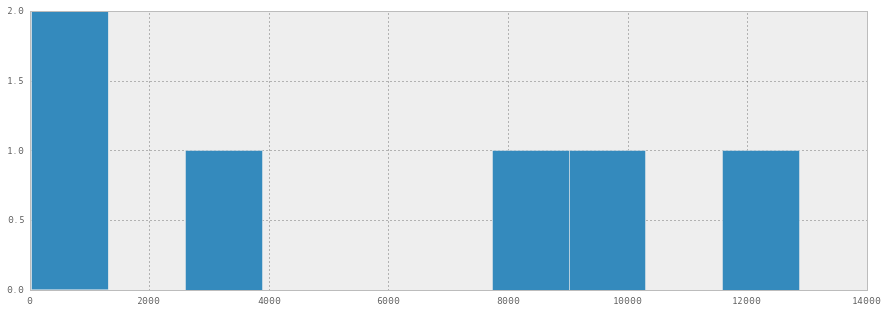

In [79]:
#### page_view distribution for clickers and non-clickers
#######
#######
data_clicker = data.dropna(subset = ['ad_type_userid']) 
click_browser_count = data_clicker[['f_browser']].groupby('f_browser').size()
print click_browser_count
plt.hist(click_browser_count)


In [125]:
pagecategory_select = select_top_category(data_analyze['f_event_request_pagecategory'].dropna(),90)
uservehicle_select = select_top_category(data_analyze['f_event_uservehicle'].dropna(),90)
browser_select = select_top_category(data['f_browser'].dropna(),97)
devicemodel_select = select_top_category(data['f_devicemodel'].dropna(),95)
platformtype_select = select_top_category(data['f_platformtype'].dropna(),99)

devicemodel_select

['Windows PC', 'Android', 'iPhone', 'Mac']

In [139]:
hash_col_other(data_analyze_copy, 'f_browser', browser_select)
hash_col_other(data_analyze_copy, 'f_devicemodel', devicemodel_select)
hash_col_other(data_analyze_copy, 'f_platformtype', platformtype_select)



Exception KeyboardInterrupt in 'zmq.backend.cython.message.Frame.__dealloc__' ignored


KeyboardInterrupt: 

In [ ]:
data_analyze_copy.head(5)

In [7]:
grouped = data.groupby(['f_event_guid_userid','click_record_datetime'])
grouped_by_id = data.groupby('f_event_guid_userid')
print "Num of clicks: %d." % len(grouped)
print "Num of unique users: %d." % len(grouped_by_id)
print "Num of mroe clicks: %d." % (len(grouped)-len(grouped_by_id))

## grouped_id: people whose total page views < 100
grouped_id = grouped_by_id.filter(lambda x: len(x['pre_page']) < 100)

## Page before clicks (grouped)
grouped_id_prepage = grouped_id[grouped_id['pre_page2']==1]\
                    .groupby(['f_event_guid_userid','click_record_datetime'])
grouped_id_total = grouped_id.groupby(['f_event_guid_userid','click_record_datetime'])


Num of clicks: 131955.
Num of unique users: 113768.
Num of mroe clicks: 18187.


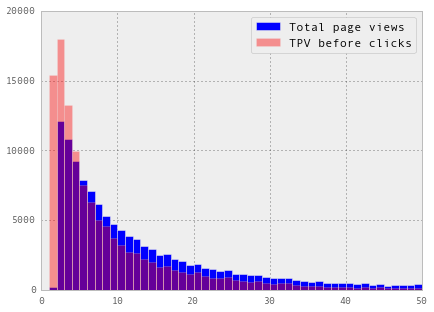

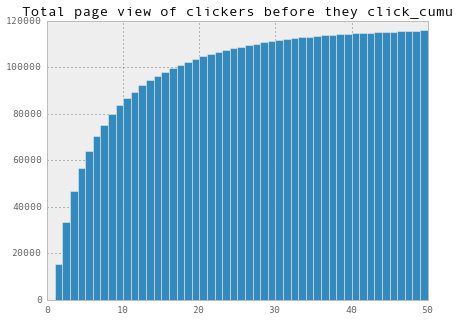

In [22]:
pl.subplot(1, 2, 1)
plt.hist(grouped_id_total.size(),bins = 50, range = (0,50),color = 'b', label ='Total page views')
plt.hist(grouped_id_prepage.size(),bins = 50, range =(0,50),color ='r',alpha = 0.4, label ='TPV before clicks')
plt.legend()
plt.show()

pl.subplot(1, 2, 2)
plt.hist(grouped_id_prepage.size(),bins = 50, range =(0,50),cumulative = True)
plt.title("Total page view of clickers before they click_cumu")
plt.show()

##1. People who click the adds are more likely than other people to click again; 
##   10% of clicks from second time clickers

##2. Considerable percentage of clickers views > 1 pages in total, but after they click the ads, ad clicks happens most at 1-7 pages. 


In [25]:
## on which page do they click
## first ? page they see before click
#click_page = grouped['pre_page'].sum()
#click_page

last_page = data.groupby(['f_event_guid_userid','click_guid_timestamp'],as_index=False)['pre_page2']\
                .agg({'click_page_num' : np.sum,\
                      'total_page_num' : lambda x: len(x)})

last_pageinfo = data[data['pre_page2']==1]\
                .groupby(['f_event_guid_userid','click_guid_timestamp']).agg(lambda x: x.iloc[-1])\
                [['f_event_request_pagename']]
last_pageinfo
               # .groupby(['f_event_guid_userid','click_guid_timestamp']).agg(lambda x: x.iloc[-1])                                                          
                                                                    
#last_pageinfo['f_event_guid_userid','click_guid_timestamp', 'f_event_request_pagename','f_event_request_pagecategory',\
#             'f_event_uservehicle_makename','f_event_uservehicle_modelname']
#last_page = data[last_page_index,]


KeyError: "['f_event_guid_userid' 'click_guid_timestamp'] not in index"

In [25]:
## top page category for clickers page view > 3
data_view = data.groupby('f_event_guid_userid').filter(lambda x: len(x['pre_page']) > 3 and len(x['pre_page']) < 50)

,f_event_guid_userid,f_event_guid_sessionid,event_guid_timestamp,event_record_datatime_plus,click_guid_timestamp,click_record_datetime,f_event_request_pagename,f_event_request_pagecategory,f_event_request_requesturl,f_event_uservehicle_makename,f_event_uservehicle_modelname,pre_page,pre_page2
0,0000b0d0-1d07-11e5-a713-0abcc5621320,434747060427600960,1435435161495,2015-06-27 15:59:21 UTC,0,2015-06-27 15:59:42 UTC,mobile_used_model_mydp_features,mobile_used_model_mydp,http://www.edmunds.com/lexus/is-300/2002/featu...,lexus,is300,1,1
1,0000b0d0-1d07-11e5-a713-0abcc5621320,434747060427600960,1435435181714,2015-06-27 15:59:41 UTC,0,2015-06-27 15:59:42 UTC,mobile_used_model_mydp_features,mobile_used_model_mydp,http://www.edmunds.com/lexus/is-300/2002/featu...,lexus,is300,1,1
2,0000b0d0-1d07-11e5-a713-0abcc5621320,434747060427600960,1435435274975,2015-06-27 16:01:15 UTC,0,2015-06-27 15:59:42 UTC,mobile_model_review,mobile_model_review,http://www.edmunds.com/toyota/supra/,toyota,supra,-1,0
3,0000b0d0-1d07-11e5-a713-0abcc5621320,434747060427600960,1435435296066,2015-06-27 16:01:37 UTC,0,2015-06-27 15:59:42 UTC,mobile_used_model_car_inventory_srp,mobile_used_model_car_inventory,http://www.edmunds.com/inventory/used/srp.html...,NaN,NaN,-1,0
4,0000b0d0-1d07-11e5-a713-0abcc5621320,434747060427600960,1435435298333,2015-06-27 16:01:38 UTC,0,2015-06-27 15:59:42 UTC,mobile_model_review,mobile_model_review,http://www.edmunds.com/toyota/supra/,toyota,supra,-1,0


In [39]:
data_view_p3 = data_view.groupby('f_event_guid_userid').head(3)
data_view_p3.loc[:,'click'] = data_view_p3.loc[:,'pre_page'].replace(1,0)
data_view_p3.loc[:,'click'] = data_view_p3.loc[:,'click'].replace(-1,1)
data_view_p3.head()

,f_event_guid_userid,f_event_guid_sessionid,event_guid_timestamp,event_record_datatime_plus,click_guid_timestamp,click_record_datetime,f_event_request_pagename,f_event_request_pagecategory,f_event_request_requesturl,f_event_uservehicle_makename,f_event_uservehicle_modelname,pre_page,pre_page2,click
0,0000b0d0-1d07-11e5-a713-0abcc5621320,434747060427600960,1435435161495,2015-06-27 15:59:21 UTC,0,2015-06-27 15:59:42 UTC,mobile_used_model_mydp_features,mobile_used_model_mydp,http://www.edmunds.com/lexus/is-300/2002/featu...,lexus,is300,1,1,0
1,0000b0d0-1d07-11e5-a713-0abcc5621320,434747060427600960,1435435181714,2015-06-27 15:59:41 UTC,0,2015-06-27 15:59:42 UTC,mobile_used_model_mydp_features,mobile_used_model_mydp,http://www.edmunds.com/lexus/is-300/2002/featu...,lexus,is300,1,1,0
2,0000b0d0-1d07-11e5-a713-0abcc5621320,434747060427600960,1435435274975,2015-06-27 16:01:15 UTC,0,2015-06-27 15:59:42 UTC,mobile_model_review,mobile_model_review,http://www.edmunds.com/toyota/supra/,toyota,supra,-1,0,1
6,00013390-af0a-11e4-ac54-06441e000c7e,421127720232956672,1435164310389,2015-06-24 12:45:10 UTC,1435164817080,2015-06-24 12:53:39 UTC,new_finder,new_finder,http://www.edmunds.com/finder/car-finder-resul...,NaN,NaN,1,1,0
7,00013390-af0a-11e4-ac54-06441e000c7e,421127720232956672,1435164456168,2015-06-24 12:47:36 UTC,1435164817080,2015-06-24 12:53:39 UTC,new_cars_pricepromise_index,new_cars_pricepromise,http://www.edmunds.com/price-promise.html,NaN,NaN,1,1,0


test = defaultdict(int)
test['user'] = 1
test.items()

In [157]:
page_feature_table_try2.head(50)

,f_event_guid_userid,f_event_guid_sessionid,event_guid_timestamp,event_record_datatime_plus,click_guid_timestamp,click_record_datetime,f_event_request_pagename,f_event_request_pagecategory,f_event_request_requesturl,f_event_uservehicle_makename,f_event_uservehicle_modelname,pre_page,pre_page2,click,f_event_request_pagecategory=new_model_mydp,f_event_request_pagecategory=used_model_mydp,f_event_request_pagecategory=home_page,f_event_request_pagecategory=mobile_used_model_mydp,f_event_request_pagecategory=mobile_new_model_mydp,f_event_request_pagecategory=new_type_index,f_event_request_pagecategory=model_review,f_event_request_pagecategory=model_photoflipper,f_event_request_pagecategory=new_finder,f_event_request_pagecategory=mobile_new_model_car_inventory,f_event_request_pagecategory=used_cars_index,f_event_request_pagecategory=mobile_home_page,f_event_request_pagecategory=car_reviews,f_event_request_pagecategory=mobile_model_review,f_event_request_pagecategory=new_model_car_inventory,f_event_request_pagecategory=used_model_car_inventory,...,f_event_request_pagecategory=WindowSticker_D,f_event_request_pagecategory=MiscPage_47,f_event_request_pagecategory=CertifiedVehicles,f_event_request_pagecategory=emp,f_event_request_pagecategory=New_Car_Inventory,f_event_request_pagecategory=mobile_used_make_car_inventory,f_event_request_pagecategory=repairshops,f_event_request_pagecategory=LandingPage_34,f_event_request_pagecategory=FinancePreQualForm,f_event_request_pagecategory=LandingPage_3,f_event_request_pagecategory=FinanceOffers_D,f_event_request_pagecategory=cpo_model_mydp,f_event_request_pagecategory=LeasevsFinance,f_event_request_pagecategory=CPOInfo_D,f_event_request_pagecategory=LandingPage_30,f_event_request_pagecategory=LandingPage_32,f_event_request_pagecategory=CorporateIncentives,f_event_request_pagecategory=LandingPage_38,f_event_request_pagecategory=LandingPage_23,f_event_request_pagecategory=LandingPage_21,f_event_request_pagecategory=LandingPage_26,f_event_request_pagecategory=MiscPage_11,f_event_request_pagecategory=Special,f_event_request_pagecategory=LandingPage_205,f_event_request_pagecategory=LandingPage_2,f_event_request_pagecategory=LandingPage_5,f_event_request_pagecategory=LandingPage_6,f_event_request_pagecategory=MiscPage,f_event_request_pagecategory=Employment,f_event_request_pagecategory=others
0,0000b0d0-1d07-11e5-a713-0abcc5621320,434747060427600960,1435435161495,2015-06-27 15:59:21 UTC,0,2015-06-27 15:59:42 UTC,mobile_used_model_mydp_features,mobile_used_model_mydp,http://www.edmunds.com/lexus/is-300/2002/featu...,lexus,is300,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0000b0d0-1d07-11e5-a713-0abcc5621320,434747060427600960,1435435181714,2015-06-27 15:59:41 UTC,0,2015-06-27 15:59:42 UTC,mobile_used_model_mydp_features,mobile_used_model_mydp,http://www.edmunds.com/lexus/is-300/2002/featu...,lexus,is300,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0000b0d0-1d07-11e5-a713-0abcc5621320,434747060427600960,1435435274975,2015-06-27 16:01:15 UTC,0,2015-06-27 15:59:42 UTC,mobile_model_review,mobile_model_review,http://www.edmunds.com/toyota/supra/,toyota,supra,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,00013390-af0a-11e4-ac54-06441e000c7e,421127720232956672,1435164310389,2015-06-24 12:45:10 UTC,1435164817080,2015-06-24 12:53:39 UTC,new_finder,new_finder,http://www.edmunds.com/finder/car-finder-resul...,NaN,NaN,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,00013390-af0a-11e4-ac54-06441e000c7e,421127720232956672,1435164456168,2015-06-24 12:47:36 UTC,1435164817080,2015-06-24 12:53:39 UTC,new_cars_pricepromise_index,new_cars_pricepromise,http://www.edmunds.com/price-promise.html,NaN,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Total num of users: 6370.
Total num of users whose num of page views (3,180): 5827.


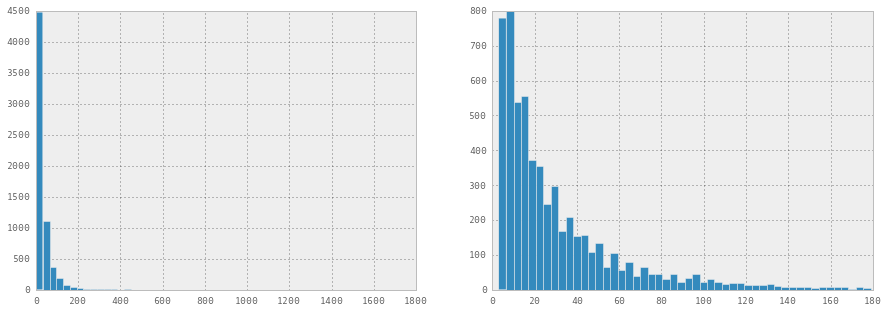

In [3]:
#grouped_size_fil = grouped_size[grouped_size < 120 and grouped_size > 5]
grouped_filter = grouped.filter(lambda x: len(x['f_event_guid_timestamp']) < 180 and 
                                len(x['f_event_guid_timestamp']) > 2)  ## filter page view between 5 and 120
grouped_filter = grouped_filter.groupby('f_event_guid_userid')

#print len(grouped_size_fil)
pl.subplot(1, 2, 1)
pl.hist(grouped.size(),50)
pl.subplot(1, 2, 2)
pl.hist(grouped_filter.size(),50)

print "Total num of users: %d." % len(grouped)
print "Total num of users whose num of page views (3,180): %d." % len(grouped_filter)



Feature selections:
a. For those medium page viewers (filtered vs not filtered based on size)
   1. what pages are popular in general? (rank the 10 most viewed pages)
   2. what pages are popular in the first 4 page views? (get data for first 4 page views for each viewer)
   
Other general behaviors:
b. how many sections are each user have, the frequency
c. how often the thank_you page accurs at the first few pages? 

In [12]:
## not categorized frequency for users
grouped_page = data.groupby('f_event_request_pagename').count()
grouped_page_top = grouped_page.sort(['f_event_guid_userid'],ascending=False)[:50]['f_event_guid_userid']
top_page_frac = 1.000* grouped_page_top.sum()/sum(data.groupby('f_event_request_pagename').count()['f_event_guid_userid'])

#print grouped_page_top.sum()
print "Top 50 page frac: %.3f" % top_page_frac
print "Total number of different pages: %d" % len(data.groupby('f_event_request_pagename'))
grouped_page_top

192524
Top 50 page frac: 0.888
Total number of different pages: 347


f_event_request_pagename
new_model_mydp_pricing_estimate                                      29971
new_model_car_inventory_srp                                          25200
home_page                                                            12727
new_model_mydp_pricing_oc_leadform_popup                              8961
new_model_car_inventory_vin_detail                                    7726
new_model_mydp_pricing_review                                         6812
new_model_car_inventory_form_thank_you_price_promise_multi_select     6354
new_model_mydp_pricing_options                                        6250
new_model_mydp_pricing                                                6213
new_model_mydp_pricing_specs                                          5619
new_model_car_inventory_form_price_promise_multi_select               5146
used_model_mydp_pricing_estimate                                      5136
new_model_car_inventory_certificate                                   4201


In [6]:
## categorized frequency for users
#grouped_bypage = data.groupby('f_event_request_pagename')

top_pagenames = grouped_page.sort(['f_event_guid_userid'],ascending=False)[:50].index

data['f_event_request_pagename'].isin(top_pagenames)


NameError: name 'grouped_page' is not defined

In [ ]:
new_car_pricing = ['new_model_mydp_pricing',]
new_car_inventory = 
new_car_photo = 

#grouped_page[grouped_page['f_event_request_pagename'].isin ][new_pagename] = 


In [4]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
samples = [[0, 0, 2], [1, 0, 0], [0, 0, 1]]
neigh = NearestNeighbors(2, 0.4)
neigh.fit(samples)  

neigh.kneighbors([[0, 0, 1.3]], 3, return_distance=False)

array([[2, 0, 1]])

def return_top_category(name_count, percent):
    total_num = sum(map(lambda (x,y): y, name_count))
    accum = 0.0
    name_percent = defaultdict(int)

    for name, count in name_count:
        accum = accum + count
        accum_percent = accum/total_num
        name_percent[name] = accum_percent
    
    name_percent_out = sorted(filter(lambda (x,y): y < percent/100.0,name_percent.items()),key = lambda tup: tup[1])
    name_list = map(lambda(x,y): x,name_percent_out)
    #name_list                 
    return name_list